In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

CSV_MANHATTAN_INPUT_PATH = r""
CSV_EUCLIDEAN_INPUT_PATH = r""

x_train_m28 = pd.read_csv(CSV_MANHATTAN_INPUT_PATH +
                          r"\28 distanze\train.csv", header=None)
x_test_m28 = pd.read_csv(CSV_MANHATTAN_INPUT_PATH +
                         r"\28 distanze\test.csv", header=None)
y_train_m28 = x_train_m28.iloc[:, 0]
x_train_m28 = x_train_m28.drop(0, axis=1)
y_test_m28 = x_test_m28.iloc[:, 0]
x_test_m28 = x_test_m28.drop(0, axis=1)

x_val_m28, x_test_m28, y_val_m28, y_test_m28 = train_test_split(
    x_test_m28, y_test_m28, test_size=0.5, random_state=42)

cv = [([*range(0, y_train_m28.shape[0])],
       [*range(y_train_m28.shape[0], y_train_m28.shape[0] + y_val_m28.shape[0])])]

y_train_m28 = np.concatenate((y_train_m28, y_val_m28), axis=0, dtype=np.int32)
x_train_m28 = np.concatenate(
    (x_train_m28, x_val_m28), axis=0, dtype=np.float32)
y_test_m28 = y_test_m28.to_numpy(np.int32)
x_test_m28 = x_test_m28.to_numpy(np.float32)


x_train_m24 = pd.read_csv(CSV_MANHATTAN_INPUT_PATH +
                          r"\24 distanze\train.csv", header=None)
x_test_m24 = pd.read_csv(CSV_MANHATTAN_INPUT_PATH +
                         r"\24 distanze\test.csv", header=None)
y_train_m24 = x_train_m24.iloc[:, 0]
x_train_m24 = x_train_m24.drop(0, axis=1)
y_test_m24 = x_test_m24.iloc[:, 0]
x_test_m24 = x_test_m24.drop(0, axis=1)

x_val_m24, x_test_m24, y_val_m24, y_test_m24 = train_test_split(
    x_test_m24, y_test_m24, test_size=0.5, random_state=42)

y_train_m24 = np.concatenate((y_train_m24, y_val_m24), axis=0, dtype=np.int32)
x_train_m24 = np.concatenate(
    (x_train_m24, x_val_m24), axis=0, dtype=np.float32)
y_test_m24 = y_test_m24.to_numpy(np.int32)
x_test_m24 = x_test_m24.to_numpy(np.float32)


x_train_e28 = pd.read_csv(CSV_EUCLIDEAN_INPUT_PATH +
                          r"\28 distanze\train.csv", header=None)
x_test_e28 = pd.read_csv(CSV_EUCLIDEAN_INPUT_PATH +
                         r"\28 distanze\test.csv", header=None)
y_train_e28 = x_train_e28.iloc[:, 0]
x_train_e28 = x_train_e28.drop(0, axis=1)
y_test_e28 = x_test_e28.iloc[:, 0]
x_test_e28 = x_test_e28.drop(0, axis=1)

x_val_e28, x_test_e28, y_val_e28, y_test_e28 = train_test_split(
    x_test_e28, y_test_e28, test_size=0.5, random_state=42)

y_train_e28 = np.concatenate((y_train_e28, y_val_e28), axis=0, dtype=np.int32)
x_train_e28 = np.concatenate(
    (x_train_e28, x_val_e28), axis=0, dtype=np.float32)
y_test_e28 = y_test_e28.to_numpy(np.int32)
x_test_e28 = x_test_e28.to_numpy(np.float32)


x_train_e24 = pd.read_csv(CSV_EUCLIDEAN_INPUT_PATH +
                          r"\24 distanze\train.csv", header=None)
x_test_e24 = pd.read_csv(CSV_EUCLIDEAN_INPUT_PATH +
                         r"\24 distanze\test.csv", header=None)
y_train_e24 = x_train_e24.iloc[:, 0]
x_train_e24 = x_train_e24.drop(0, axis=1)
y_test_e24 = x_test_e24.iloc[:, 0]
x_test_e24 = x_test_e24.drop(0, axis=1)

x_val_e24, x_test_e24, y_val_e24, y_test_e24 = train_test_split(
    x_test_e24, y_test_e24, test_size=0.5, random_state=42)

y_train_e24 = np.concatenate((y_train_e24, y_val_e24), axis=0, dtype=np.int32)
x_train_e24 = np.concatenate(
    (x_train_e24, x_val_e24), axis=0, dtype=np.float32)
y_test_e24 = y_test_e24.to_numpy(np.int32)
x_test_e24 = x_test_e24.to_numpy(np.float32)

datasets = {
    "manhattan28": [x_train_m28, y_train_m28, x_test_m28, y_test_m28],
    "manhattan24": [x_train_m24, y_train_m24, x_test_m24, y_test_m24],
    "euclidea28": [x_train_e28, y_train_e28, x_test_e28, y_test_e28],
    "euclidea24": [x_train_e24, y_train_e24, x_test_e24, y_test_e24]
}


In [2]:
import mlflow
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

EXPERIMENT_NAME = "forest"

mlflow.set_experiment(EXPERIMENT_NAME)
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

scaler = StandardScaler()
forest = RandomForestClassifier(random_state=42)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", PCA()), ("forest", forest)])

parameters = {
    "pca": ["passthrough", PCA(0.95, random_state=42), PCA(0.99, random_state=42)],
    "forest__n_estimators": [100, 200, 300, 400, 500]
}

clf = GridSearchCV(pipe, parameters, scoring="accuracy", n_jobs=3, cv=cv)
for key, dataset in datasets.items():
    with mlflow.start_run(experiment_id=experiment.experiment_id, nested=True):
        clf.fit(dataset[0], dataset[1])

        mlflow.log_param("dataset", key)
        if (type(clf.best_estimator_["pca"]) == str):
            mlflow.log_param("pca", clf.best_estimator_["pca"])
        else:
            mlflow.log_param("pca", clf.best_estimator_["pca"].n_components)
        mlflow.log_param("forest__n_estimators",
                         clf.best_estimator_["forest"].n_estimators)

        for i in range(len((clf.cv_results_["mean_test_score"]))):
            with mlflow.start_run(experiment_id=experiment.experiment_id, nested=True):
                mlflow.log_param("dataset", key)
                if (type(clf.cv_results_["param_pca"][i]) == str):
                    mlflow.log_param("pca", clf.cv_results_["param_pca"][i])
                else:
                    mlflow.log_param("pca", clf.cv_results_[
                                     "param_pca"][i].n_components)
                mlflow.log_param("forest__n_estimators", clf.cv_results_[
                                 "param_forest__n_estimators"][i])
                mlflow.log_metric("mean_fit_time", clf.cv_results_[
                                  "mean_fit_time"][i])
                mlflow.log_metric("mean_score_time", clf.cv_results_[
                                  "mean_score_time"][i])
                mlflow.log_metric("mean_test_score", clf.cv_results_[
                                  "mean_test_score"][i])


In [3]:
""" from sklearn.inspection import permutation_importance

parameters = {
    "pca": ["passthrough"],
    "forest__n_estimators": [100, 200, 300, 400, 500]
}

clf = GridSearchCV(pipe, parameters, scoring="accuracy", cv=cv)
clf.fit(datasets["manhattan28"][0], datasets["manhattan28"][1])
print(clf.best_estimator_.steps)
print(clf.score(datasets["manhattan28"][2], datasets["manhattan28"][3]))

feature_names = [f"feature {i}" for i in range(
    datasets["manhattan28"][0].shape[1])]
result = permutation_importance(
    clf, datasets["manhattan28"][2], datasets["manhattan28"][3], n_repeats=10, random_state=42, n_jobs=-1)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

feature_names = list(range(1, 29))
std = [0] * 28
for i, s in enumerate(result.importances_std):
    std[i % len(std)] = std[i % len(std)] + s**2
std = np.sqrt(std)
std = pd.Series(std, index=feature_names)
mean = [0] * 28
for i, m in enumerate(result.importances_mean):
    mean[i % len(mean)] = mean[i % len(mean)] + m
mean = pd.Series(mean, index=feature_names)
 """


[('scaler', StandardScaler()), ('pca', 'passthrough'), ('forest', RandomForestClassifier(n_estimators=400, random_state=42))]
0.4666666666666667


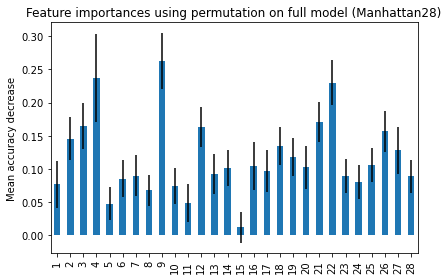

In [4]:
""" import matplotlib.pyplot as plt

fig, ax = plt.subplots()
mean.plot.bar(yerr=std, ax=ax)
ax.set_title(
    "Feature importances using permutation on full model (Manhattan28)")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()
 """


In [5]:
""" from sklearn.inspection import permutation_importance

parameters = {
    "pca": ["passthrough"],
    "forest__n_estimators": [100, 200, 300, 400, 500]
}

clf = GridSearchCV(pipe, parameters, scoring="accuracy", cv=cv)
clf.fit(datasets["euclidea28"][0], datasets["euclidea28"][1])
print(clf.best_estimator_.steps)
print(clf.score(datasets["euclidea28"][2], datasets["euclidea28"][3]))

feature_names = [f"feature {i}" for i in range(
    datasets["euclidea28"][0].shape[1])]
result = permutation_importance(
    clf, datasets["euclidea28"][2], datasets["euclidea28"][3], n_repeats=10, random_state=42, n_jobs=-1)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

feature_names = list(range(1, 29))
std = [0] * 28
for i, s in enumerate(result.importances_std):
    std[i % len(std)] = std[i % len(std)] + s**2
std = np.sqrt(std)
std = pd.Series(std, index=feature_names)
mean = [0] * 28
for i, m in enumerate(result.importances_mean):
    mean[i % len(mean)] = mean[i % len(mean)] + m
mean = pd.Series(mean, index=feature_names)
 """


[('scaler', StandardScaler()), ('pca', 'passthrough'), ('forest', RandomForestClassifier(n_estimators=200, random_state=42))]
0.45555555555555555


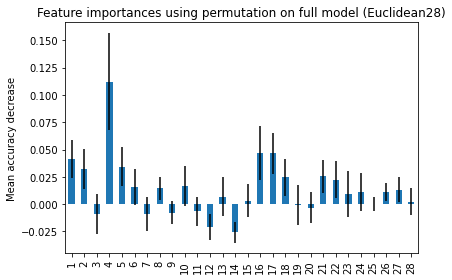

In [6]:
""" import matplotlib.pyplot as plt

fig, ax = plt.subplots()
mean.plot.bar(yerr=std, ax=ax)
ax.set_title(
    "Feature importances using permutation on full model (Euclidean28)")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()
 """


In [7]:
""" pipe = Pipeline(steps=[("scaler", StandardScaler()), ("pca", PCA(
    0.95, random_state=42)), ("forest", RandomForestClassifier(300, random_state=42))])

pipe.fit(datasets["manhattan28"][0][:len(cv[0][0]) - 1][:],
         datasets["manhattan28"][1][:len(cv[0][0]) - 1][:])
print(pipe.score(datasets["manhattan28"][2], datasets["manhattan28"][3]))
 """


0.4222222222222222


In [8]:
""" import os
from joblib import dump

MODEL__PATH = r""

version = "v1.1"

os.chdir(MODEL__PATH.format(type=type, version=version))
dump(pipe, "filename.joblib")
 """


['filename.joblib']